In [7]:
import numpy as np 
import pandas as pd 
import os


In [4]:
df = pd.read_csv('age_gender.csv')
df.head()

age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...  
3  193 197 198 200 199 200 202 203 204 205 208 21...  
4  202 205 209 210 209 209 210 211 212 214 218 21...

In [8]:
df.shape

(23705, 5)

In [9]:
print(f'Total Data Points: {df.shape[1]}')
print(f'Total columns/Features: {df.shape[0]}')

Total Data Points: 5
Total columns/Features: 23705


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [11]:
type(df.pixels[0])

str

In [12]:
df['pixels'] = df['pixels'].apply(lambda x:  np.reshape(np.array(x.split(), dtype="float32"), (48,48)))
df.head()

age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  [[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13...  
1  [[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...  
2  [[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...  
3  [[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 20...  
4  [[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 21...

In [14]:
type(df.pixels[0]) 

numpy.ndarray

In [15]:
fig = px.histogram(df, x="age")
fig.update_layout(title_text='Age Histogram')
fig.show()

In [16]:
eth_values_to_labels = { 0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Hispanic" }
gender_values_to_labels = { 0: "Male", 1: "Female" }

In [17]:
df.ethnicity.value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [18]:
df.gender.value_counts()

0    12391
1    11314
Name: gender, dtype: int64

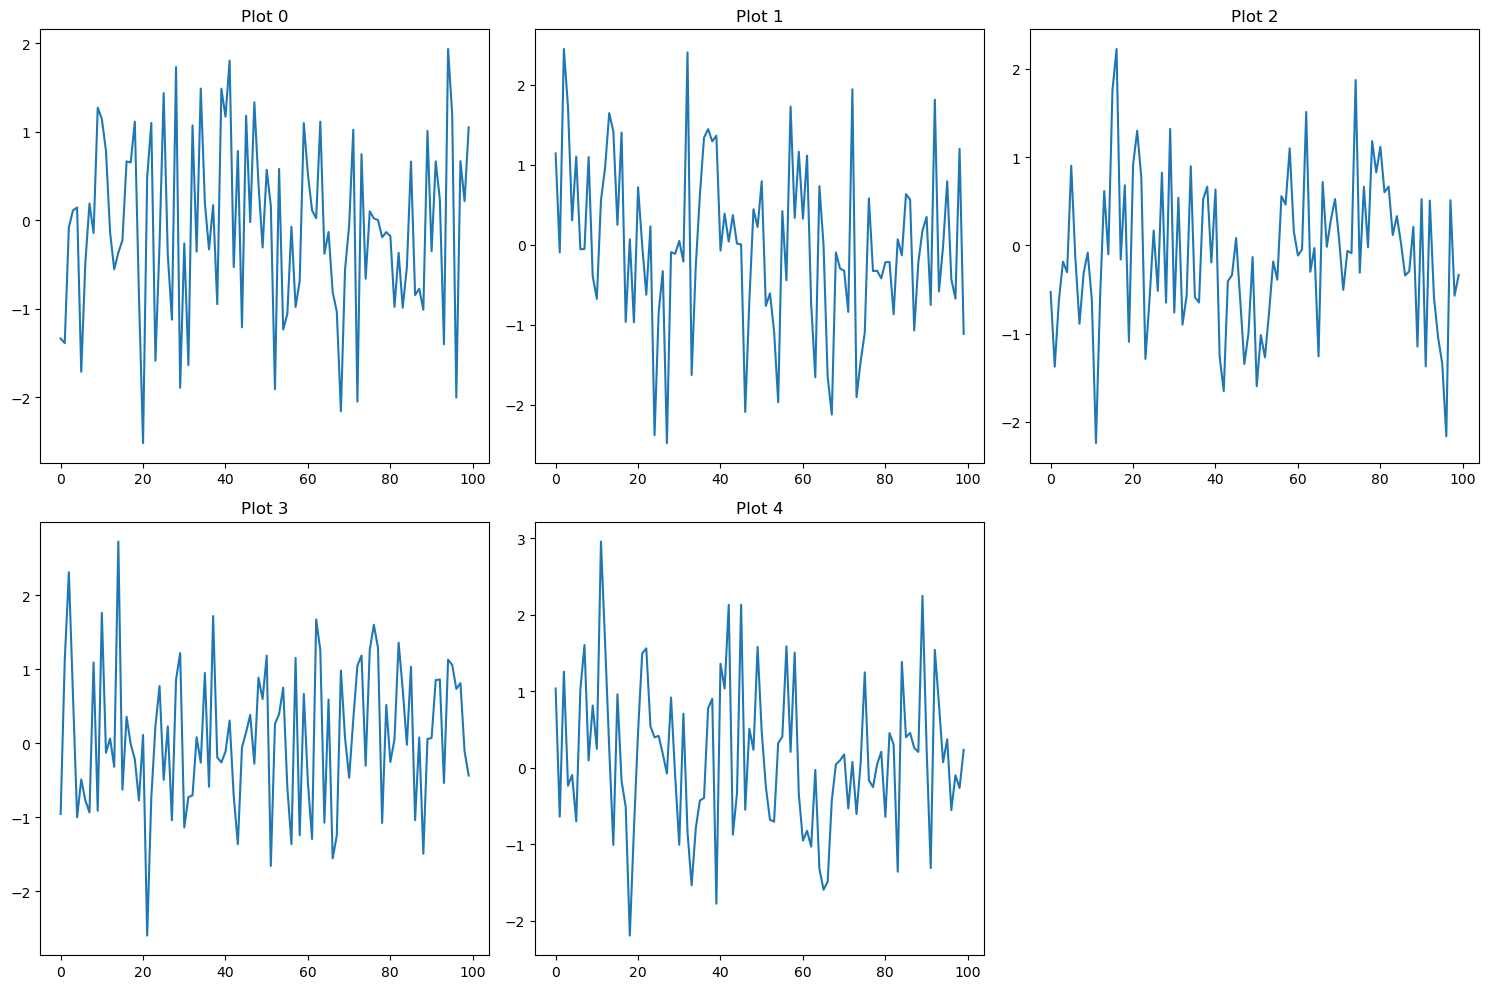

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample DataFrame (You can replace this with your actual DataFrame 'df')
df = pd.DataFrame(np.random.randn(100, 5), columns=list('ABCDE'))

def plot_data(rows, cols, lower_value, upper_value):
    # Create a subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()
    
    for i in range(rows * cols):
        if i + lower_value < upper_value:
            df.iloc[:, i % df.shape[1]].plot(ax=axes[i], title=f"Plot {i + lower_value}")
        else:
            axes[i].axis('off')  # Turn off empty subplots
    
    plt.tight_layout()
    plt.show()

# Example usage of the function
plot_data(rows=2, cols=3, lower_value=0, upper_value=len(df.columns))


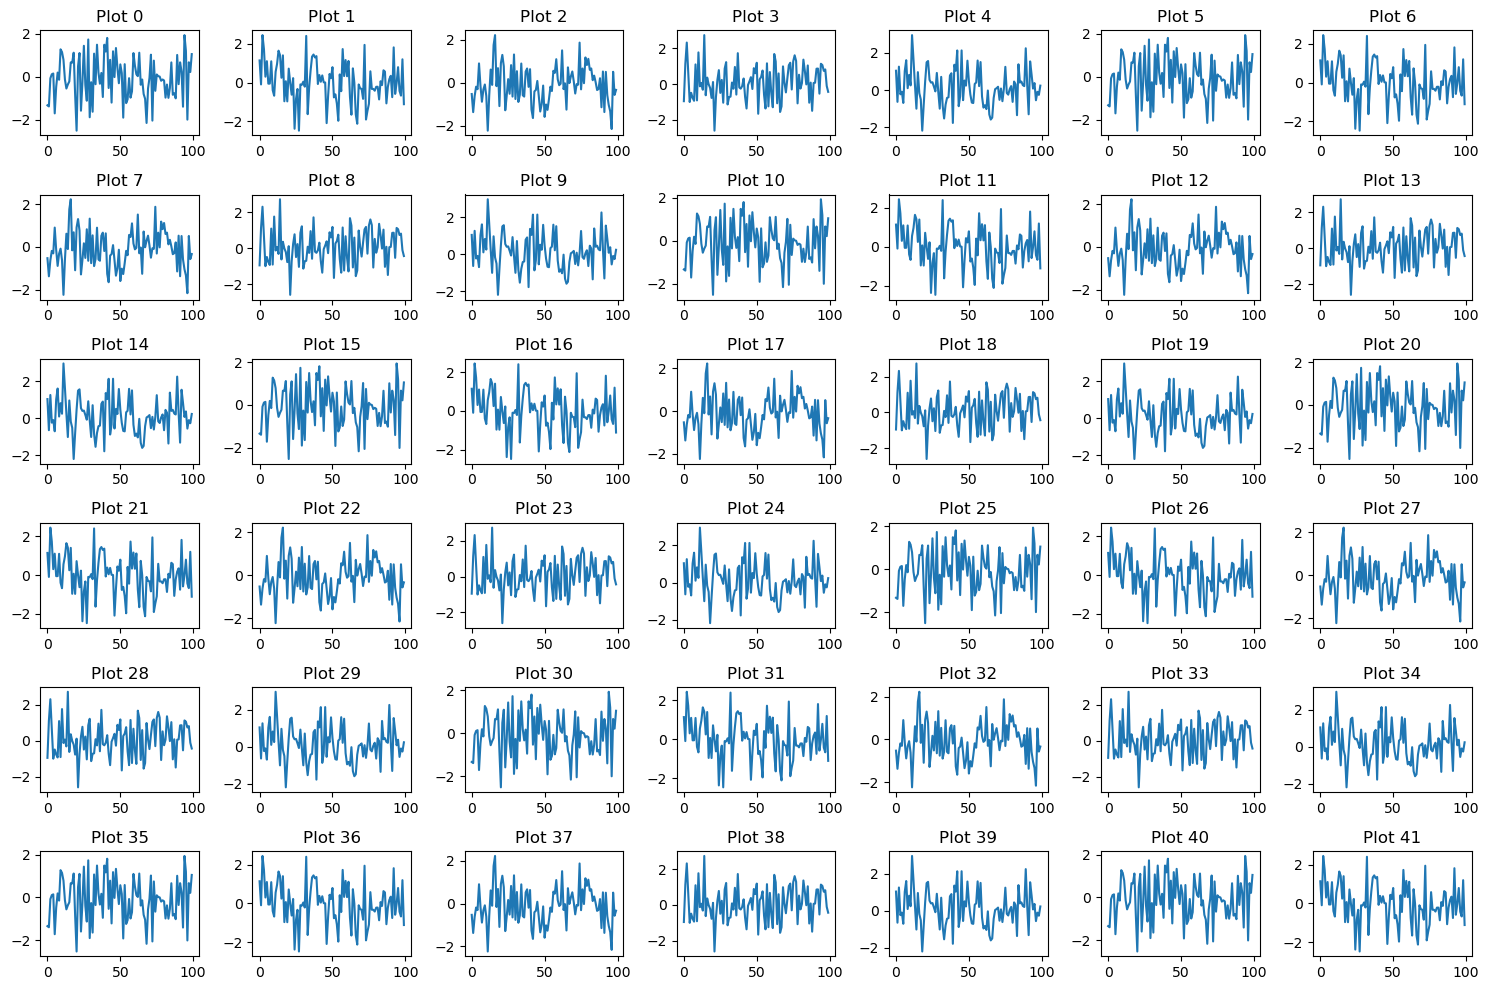

In [21]:
plot_data(rows=6, cols=7, lower_value=0, upper_value=len(df))

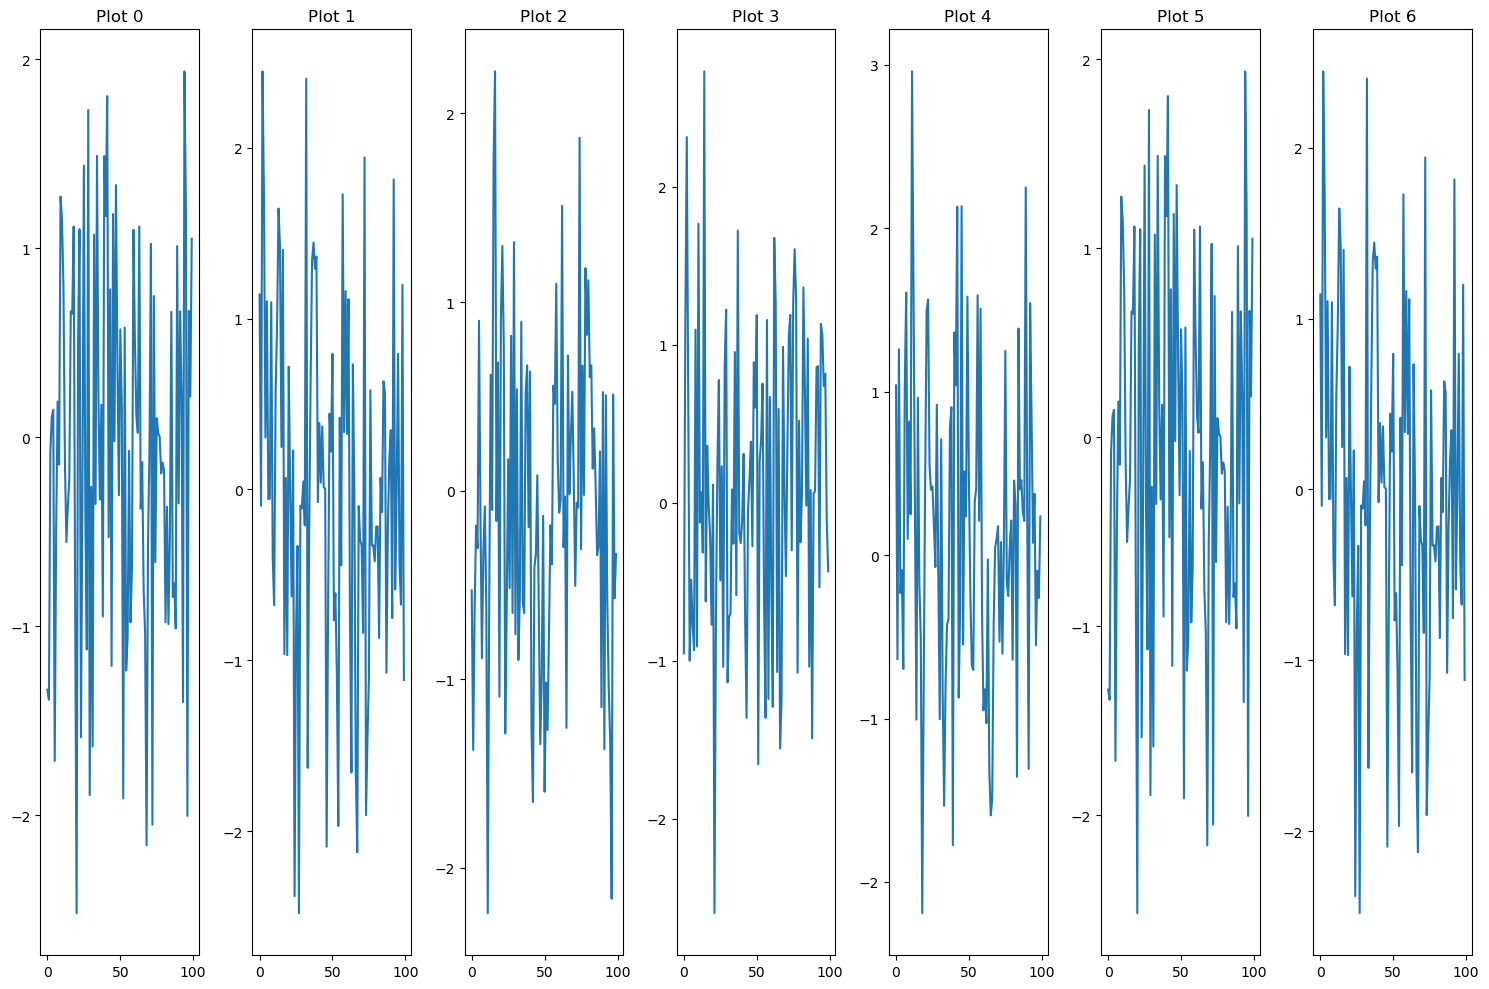

In [22]:
plot_data(rows=1, cols=7, lower_value=0, upper_value=1000)

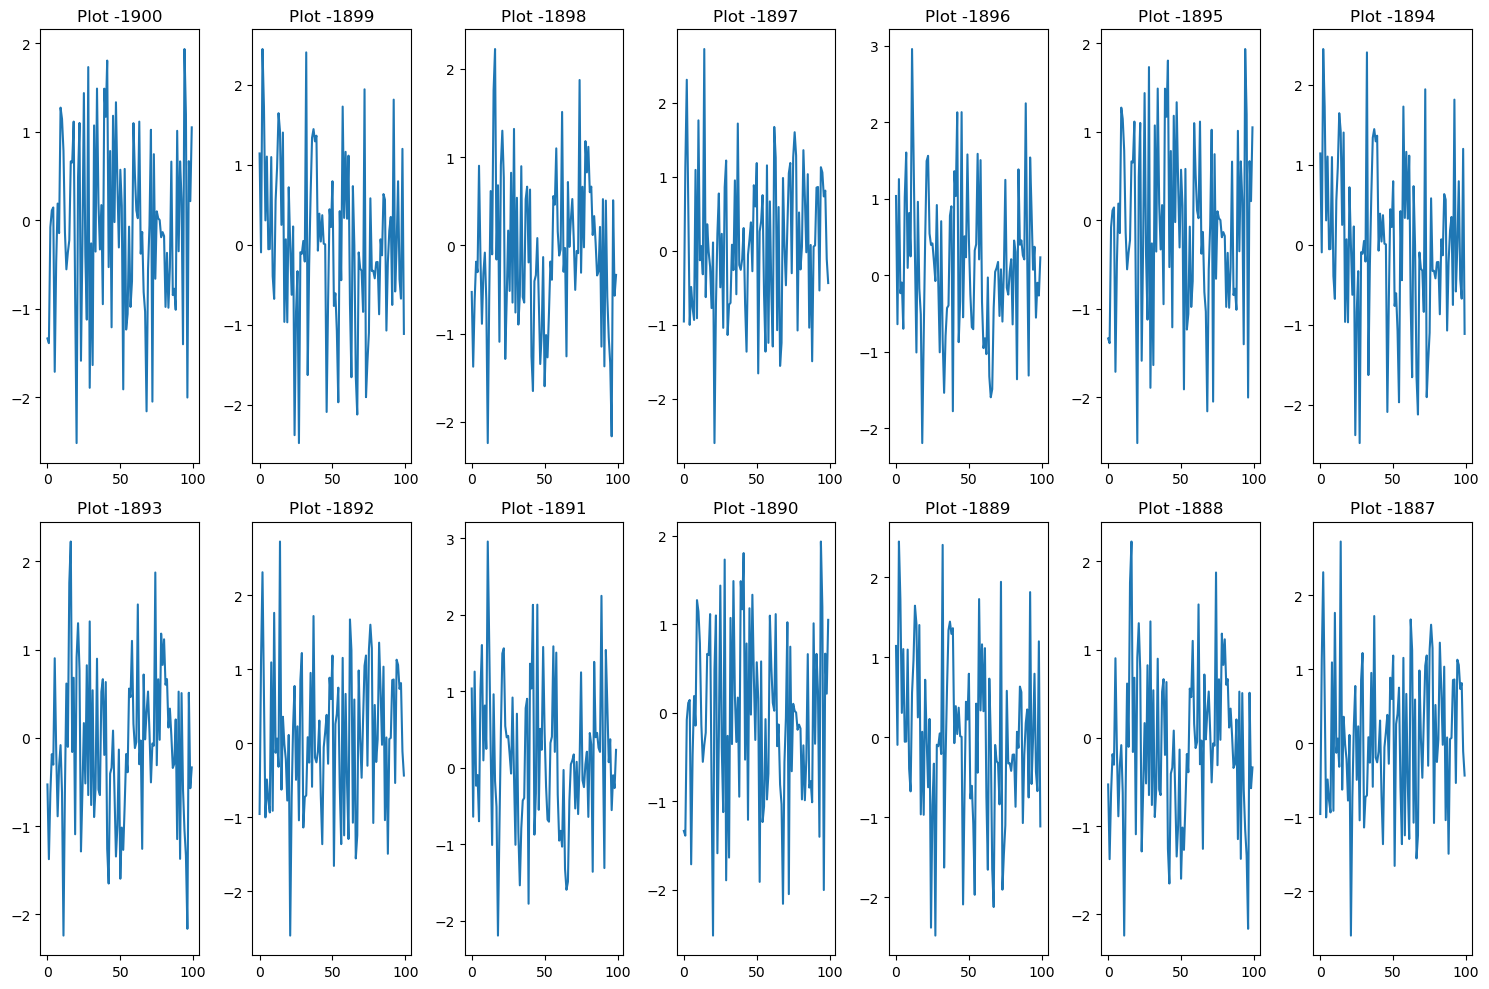

In [23]:
plot_data(rows=2, cols=7, lower_value=len(df)-2000, upper_value=len(df))

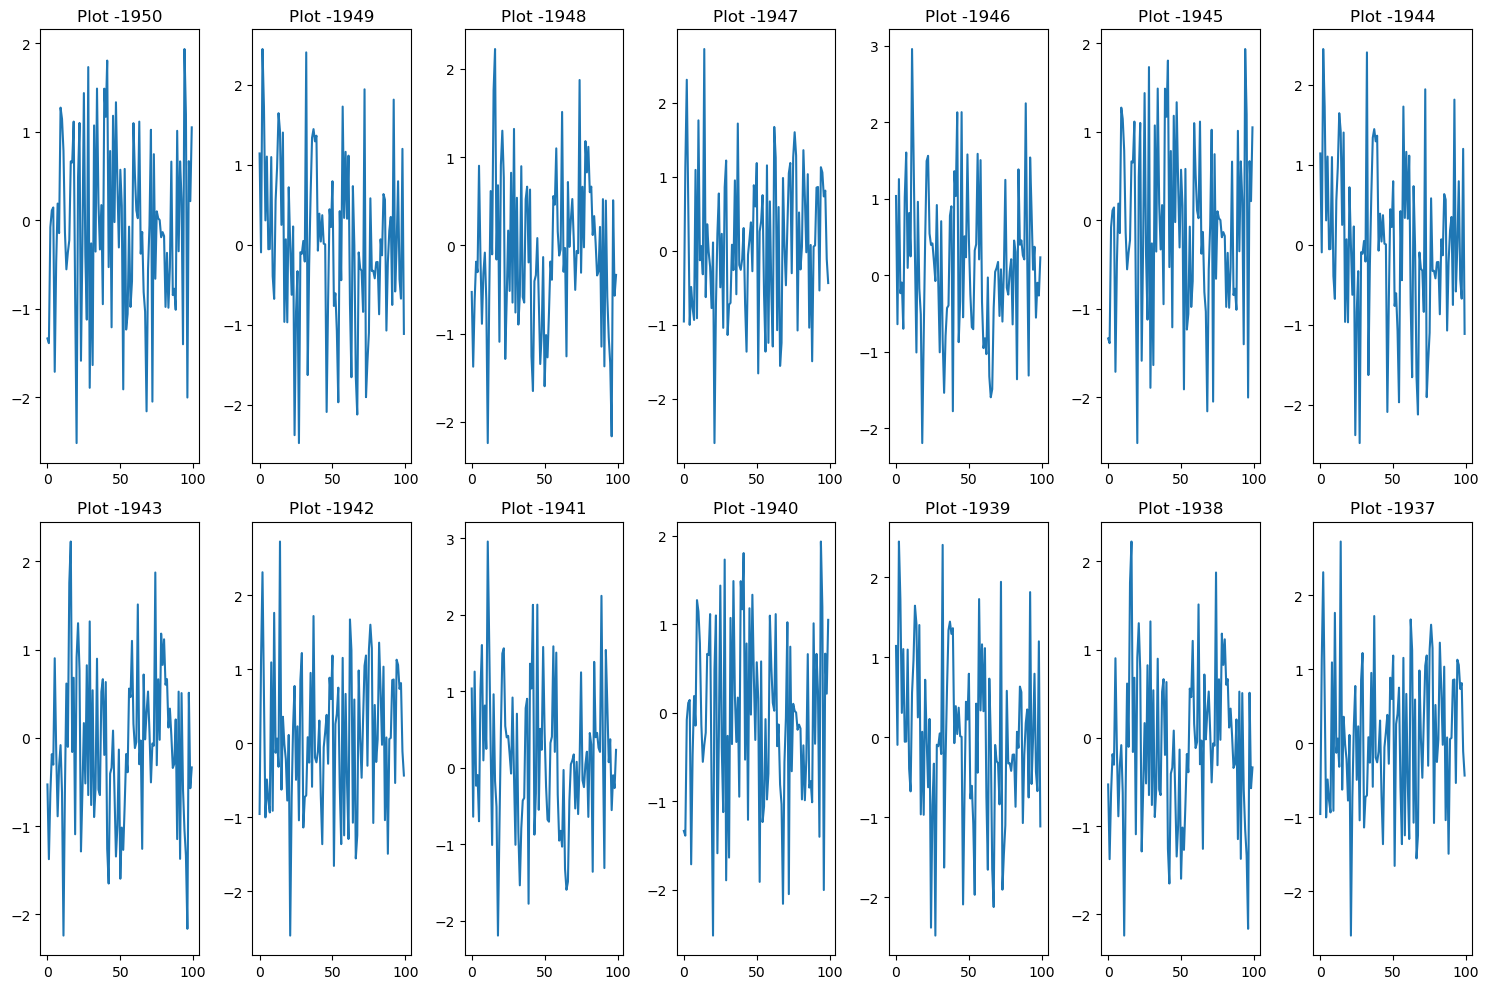

In [24]:
plot_data(rows=2, cols=7, lower_value=(len(df)-4000)//2, upper_value=len(df)//2)

In [26]:
print(df.columns)


Index(['A', 'B', 'C', 'D', 'E'], dtype='object')


In [27]:
import numpy as np
import pandas as pd

# Example DataFrame with a 'pixels' column
# Assume 'pixels' contains lists or arrays of pixel values
df = pd.DataFrame({
    'pixels': [np.random.rand(48, 48) for _ in range(10)]  # Dummy data
})

psum, psum_sq = 0, 0
image_size = 48
count = len(df) * image_size * image_size

# Loop through images
for img in df['pixels']:
    psum += np.sum(img)
    psum_sq += np.sum(img**2)

# Mean, variance, and standard deviation
total_mean = psum / count
total_var  = (psum_sq / count) - (total_mean ** 2)
total_std  = np.sqrt(total_var)

# Output
print('[Dataset]')
print(f'- mean: {total_mean}')
print(f'- std: {total_std}')
print(f'- var: {total_var}')


[Dataset]
- mean: 0.5030281726696599
- std: 0.28838499269275253
- var: 0.08316590401039892
